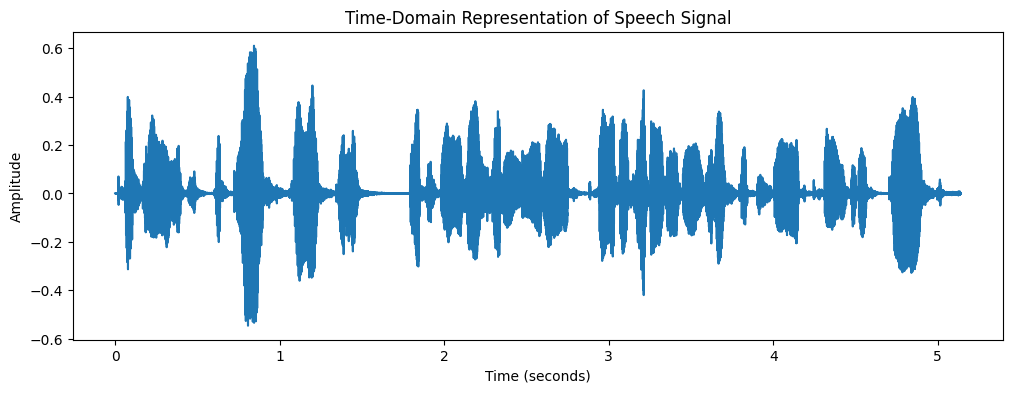

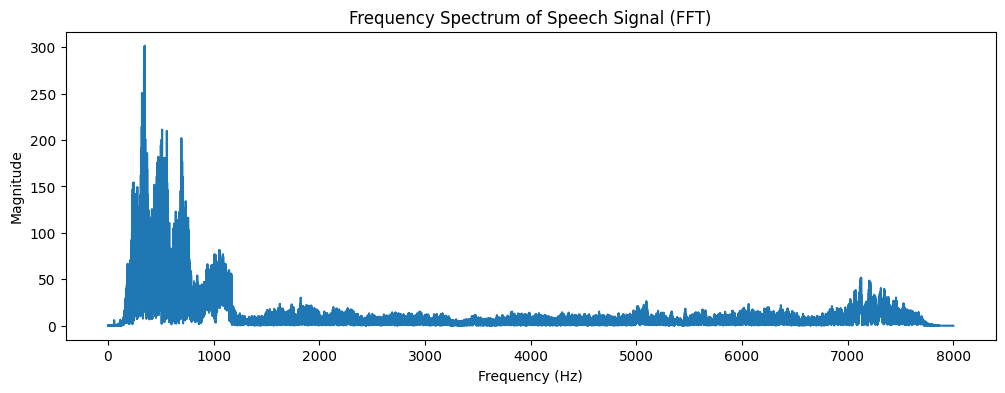

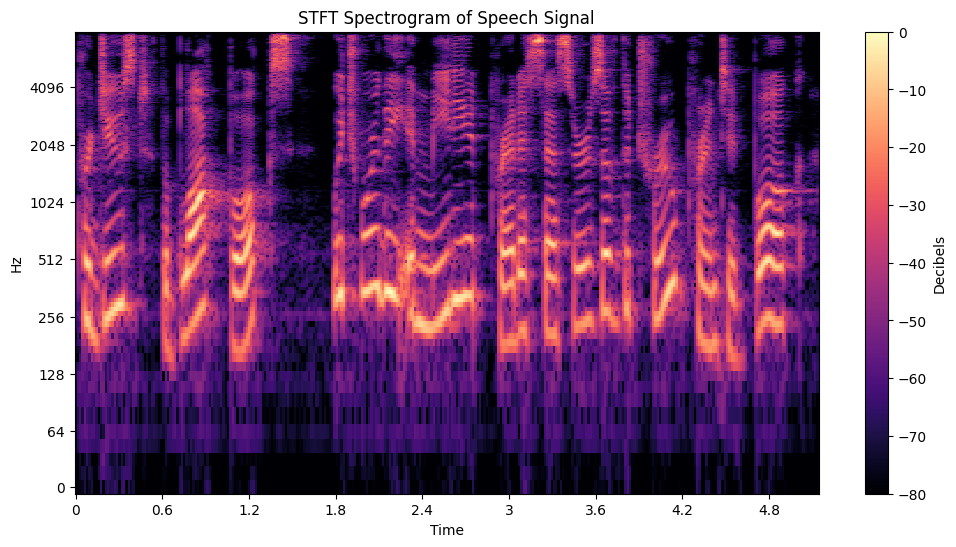

In [3]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load the speech waveform from LJ Speech dataset
audio_path = "/content/LJ001-0004.wav"
y, sr = librosa.load(audio_path, sr=16000)  # Load as mono and resample to 16kHz

# Compute the Fast Fourier Transform (FFT)
fft_spectrum = np.fft.fft(y)
freqs = np.fft.fftfreq(len(fft_spectrum), 1 / sr)

# Plot time-domain signal
plt.figure(figsize=(12, 4))
plt.plot(np.linspace(0, len(y) / sr, len(y)), y)
plt.title("Time-Domain Representation of Speech Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

# Plot frequency-domain representation
plt.figure(figsize=(12, 4))
plt.plot(freqs[:len(freqs)//2], np.abs(fft_spectrum[:len(freqs)//2]))
plt.title("Frequency Spectrum of Speech Signal (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

# Compute STFT
stft_result = librosa.stft(y, n_fft=1024, hop_length=256)
stft_db = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)

# Plot the STFT spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_db, sr=sr, hop_length=256, x_axis='time', y_axis='log')
plt.colorbar(label='Decibels')
plt.title("STFT Spectrogram of Speech Signal")
plt.show()
